In [2]:
import sys
import gensim, logging
import networkx as nx
import matplotlib.pyplot as plt 

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
w = gensim.models.KeyedVectors.load_word2vec_format('araneum_upos_skipgram_300_2_2018.vec')

2018-06-03 19:03:24,918 : INFO : loading projection weights from araneum_upos_skipgram_300_2_2018.vec
2018-06-03 19:04:21,059 : INFO : loaded (196620, 300) matrix from araneum_upos_skipgram_300_2_2018.vec


In [4]:
w.init_sims(replace=True)

2018-06-03 19:04:23,489 : INFO : precomputing L2-norms of word weight vectors


In [77]:
verbs = ['смотреть', 'моргать', 'глазеть', 'пялиться', 'жмуриться', 'плакать', 'слушать', 'слышать', 'глотать', 
         'жевать', 'молчать', 'говорить', 'кричать', 'дышать', 'обонять', 'нюхать', 'чувствовать', 'осязать', 'ощущать']

In [78]:
words = [verb + "_VERB" for verb in verbs]

In [79]:
words = ['смотреть_VERB', 'моргать_VERB', 'глазеть_VERB', 'пялиться_VERB', 'жмуриться_VERB', 'плакать_VERB',
         'слушать_VERB', 'слышать_VERB', 'глотать_VERB', 'жевать_VERB', 'молчать_VERB', 'говорить_VERB',
         'кричать_VERB', 'дышать_VERB', 'обонять_VERB', 'нюхать_VERB', 'чувствовать_VERB', 'осязать_VERB',
         'ощущать_VERB']

In [80]:
G = nx.Graph()

In [81]:
G.add_nodes_from(verbs)

In [82]:
for i in range(len(words)-1):
    for j in range(i+1, len(words)):
        if w.similarity(words[i], words[j]) > 0.5:
            G.add_edge(verbs[i], verbs[j])
print('done')

done


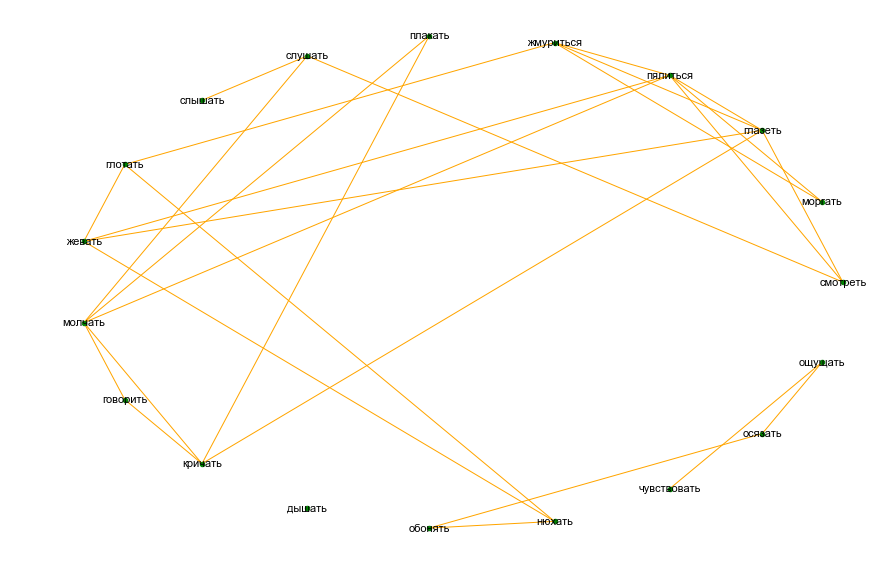

In [83]:
pos=nx.nx.shell_layout(G)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos, node_color='green', node_size=20) 
nx.draw_networkx_edges(G, pos, edge_color='orange')
nx.draw_networkx_labels(G, pos, font_size=11, font_family='Arial')
plt.axis('off') 
plt.show()

In [84]:
deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True)[:5]:
    print(nodeid)

пялиться
глазеть
молчать
жмуриться
жевать


In [85]:
connected_components = [i for i in nx.connected_component_subgraphs(G) if len(i.nodes())>1]
len(connected_components)

1

In [86]:
for component in connected_components:
    print(sorted(nx.degree_centrality(component), key = lambda x: deg[x], reverse = True)[0], nx.radius(component))

пялиться 5


In [87]:
print(nx.average_clustering(G))
print(nx.transitivity(G))

0.30350877192982456
0.29577464788732394
